In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten ,Dense

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode='nearest',
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 9624 images belonging to 3 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1312 images belonging to 3 classes.


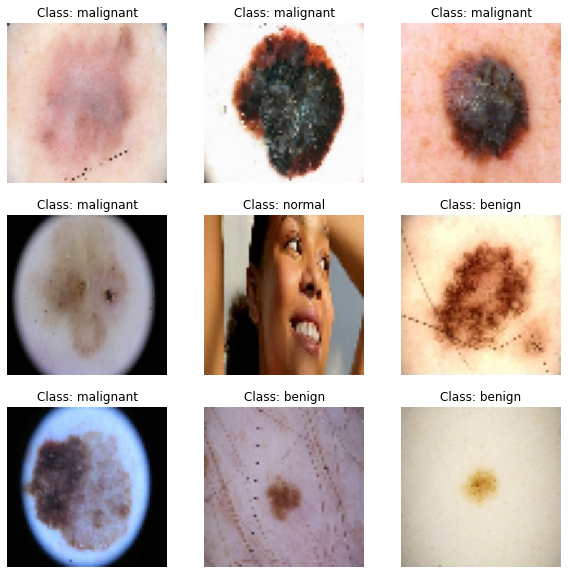

In [6]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(test_set)

class_indices = test_set.class_indices 
class_names = list(class_indices.keys())  
predicted_labels = np.argmax(labels, axis=1)

# Plot images with class names
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.show()

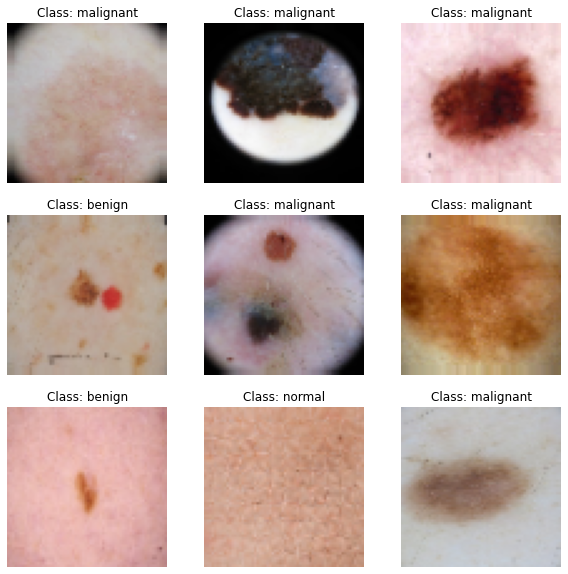

In [7]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(training_set)

class_indices = training_set.class_indices 
class_names = list(class_indices.keys())  
predicted_labels = np.argmax(labels, axis=1)

# Plot images with class names
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.show()

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [10]:
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))


In [12]:
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [15]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
history=model.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
301/301 [==============================] - 47s 154ms/step - loss: 0.5034 - accuracy: 0.7964 - val_loss: 0.8040 - val_accuracy: 0.6220
Epoch 2/50
301/301 [==============================] - 46s 154ms/step - loss: 0.3804 - accuracy: 0.8492 - val_loss: 0.6701 - val_accuracy: 0.6578
Epoch 3/50
301/301 [==============================] - 46s 152ms/step - loss: 0.3439 - accuracy: 0.8616 - val_loss: 0.5217 - val_accuracy: 0.7500
Epoch 4/50
301/301 [==============================] - 45s 150ms/step - loss: 0.3286 - accuracy: 0.8719 - val_loss: 0.6481 - val_accuracy: 0.6867
Epoch 5/50
301/301 [==============================] - 45s 150ms/step - loss: 0.3067 - accuracy: 0.8802 - val_loss: 0.5752 - val_accuracy: 0.7203
Epoch 6/50
301/301 [==============================] - 45s 149ms/step - loss: 0.2849 - accuracy: 0.8862 - val_loss: 0.5171 - val_accuracy: 0.7363
Epoch 7/50
301/301 [==============================] - 45s 149ms/step - loss: 0.2709 - accuracy: 0.8972 - val_loss: 0.5667 - val_ac

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [18]:
test_loss, test_acc = model.evaluate(test_set)
print(f"Test accuracy: {test_acc * 100:.2f} %")

41/41 [==============================] - 4s 88ms/step - loss: 0.8123 - accuracy: 0.7309
Test accuracy: 73.09 %


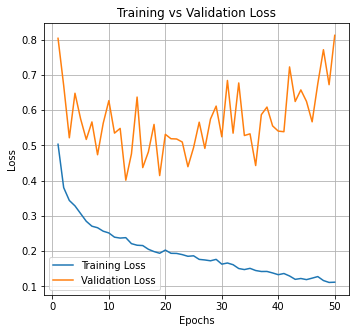

In [19]:
import matplotlib.pyplot as plt

# Get the number of epochs actually trained (assuming you trained for 100 epochs)
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

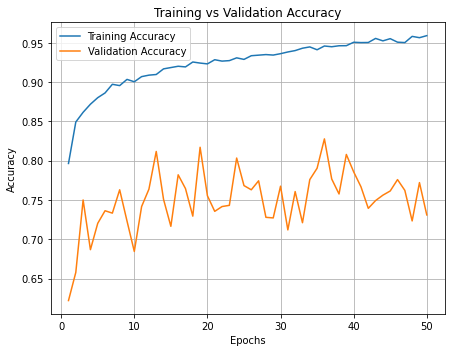

In [20]:

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

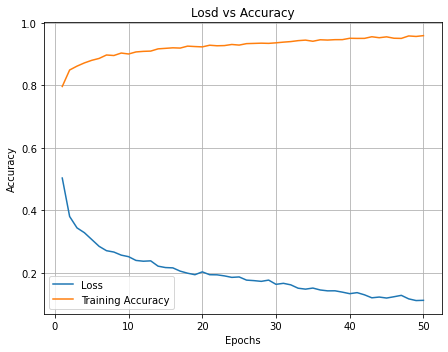

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Loss')
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.title('Loss vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [24]:
test_set.class_indices

{'benign': 0, 'malignant': 1, 'normal': 2}

In [25]:
import numpy as np

In [26]:
actual = np.empty(0)
pred = np.empty(0)

In [27]:
actual , pred

(array([], dtype=float64), array([], dtype=float64))

In [28]:
reverse_class_indices = {v: k for k, v in class_indices.items()} 

In [29]:
reverse_class_indices

{0: 'benign', 1: 'malignant', 2: 'normal'}

In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(image_path, model, class_indices):
    # Load and preprocess image
    test_image = tf.keras.utils.load_img(image_path, target_size=(64, 64))
    plt.imshow(test_image)
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0) / 255.0  # Normalize if required
    
    # Predict
    result = model.predict(test_image)
    
    # Get class labels from class indices
    reverse_class_indices = {v: k for k, v in class_indices.items()}
    predicted_class_idx = np.argmax(result[0])
    confidence = np.max(result[0])
    
    # Display prediction
    plt.title(f"Predicted: {reverse_class_indices[predicted_class_idx]}\nConfidence: {confidence*100:.2f}%")
    plt.axis('off')
    plt.show()
    
    return reverse_class_indices[predicted_class_idx], confidence

1/1 [==============================] - 0s 56ms/step


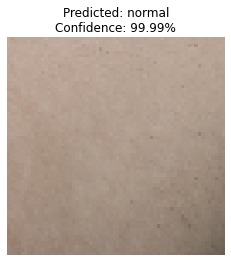

('normal', 0.99994946)

In [39]:
predict_image('dataset/test/normal/123123.jpg',model,class_indices)

1/1 [==============================] - 0s 20ms/step


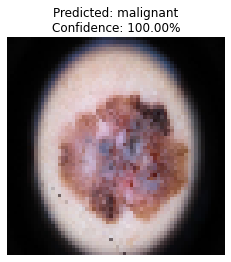

('malignant', 1.0)

In [44]:
predict_image('dataset/test/malignant/ISIC_0000281_640x480.jpg',model,class_indices)

1/1 [==============================] - 0s 44ms/step


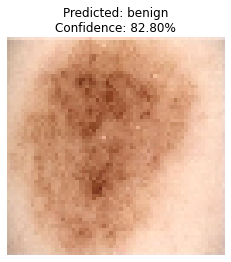

('benign', 0.8279958)

In [45]:
predict_image('dataset/test/benign/ISIC_0420381_640x480.jpg',model,class_indices)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [47]:
y_pred = model.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_set.classes

41/41 [==============================] - 4s 86ms/step


In [59]:
print(y_pred)
print(y_pred_classes)
print(y_true)

[[8.6553180e-01 1.3427167e-01 1.9660739e-04]
 [1.0000000e+00 1.8218064e-08 3.2866955e-18]
 [9.5535815e-01 4.4641890e-02 4.3927785e-15]
 ...
 [1.8345852e-09 4.5087107e-09 1.0000000e+00]
 [9.9973172e-01 2.6824386e-04 1.6282808e-11]
 [7.5604069e-01 2.4395925e-01 5.8851111e-08]]
[0 0 0 ... 2 0 0]
[0 0 0 ... 2 2 2]


In [51]:
# print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

      benign       0.42      0.63      0.50       550
   malignant       0.39      0.19      0.25       550
      normal       0.19      0.20      0.19       212

    accuracy                           0.38      1312
   macro avg       0.33      0.34      0.32      1312
weighted avg       0.37      0.38      0.35      1312




Confusion Matrix:


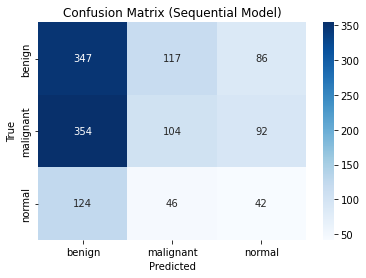

In [62]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Sequential Model)')
plt.show()

In [63]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def grad_cam_3class(model, img_array, layer_name, class_indices):
    # Create a sub-model that outputs the target layer and predictions
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(layer_name).output, model.output]
    )
    
    # Compute gradients for the predicted class
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        predicted_class_idx = tf.argmax(predictions[0])
        loss = predictions[:, predicted_class_idx]
    
    # Calculate gradients and pooled gradients
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Generate heatmap
    conv_outputs = conv_outputs[0]  # Remove batch dimension
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)
    heatmap = tf.maximum(heatmap, 0)  # ReLU
    heatmap /= tf.reduce_max(heatmap)  # Normalize
    
    # Get class name
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_class = class_labels[predicted_class_idx.numpy()]
    
    return heatmap.numpy(), predicted_class

In [64]:
class_indices

{'benign': 0, 'malignant': 1, 'normal': 2}

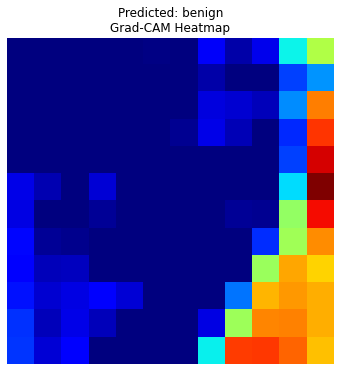

In [67]:

class_indices = {'benign': 0, 'malignant': 1, 'normal': 2}


img_path = 'dataset/test/benign/ISIC_0420381_640x480.jpg'
img = tf.keras.utils.load_img(img_path, target_size=(64, 64)) 
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0


last_conv_layer_name = "conv2d_2"  
heatmap, predicted_class = grad_cam_3class(model, img_array, last_conv_layer_name, class_indices)


plt.figure(figsize=(10, 6))
plt.imshow(img_array[0])
plt.imshow(heatmap, cmap='jet', alpha=1
plt.title(f"Predicted: {predicted_class}\nGrad-CAM Heatmap")
plt.axis('off')
plt.show()

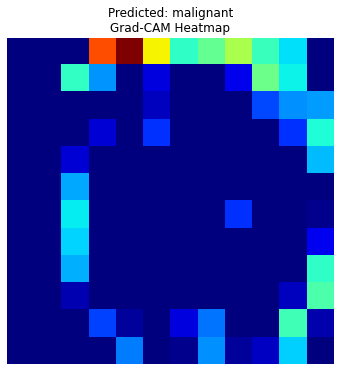

In [68]:

class_indices = {'benign': 0, 'malignant': 1, 'normal': 2}  # Replace with your actual indices


img_path = 'dataset/test/malignant/ISIC_0000281_640x480.jpg'
img = tf.keras.utils.load_img(img_path, target_size=(64, 64))  # Match model input size
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize if needed

# Generate heatmap (replace 'conv2d_2' with your last conv layer name)
last_conv_layer_name = "conv2d_2"  # Verify with model.summary()
heatmap, predicted_class = grad_cam_3class(model, img_array, last_conv_layer_name, class_indices)

# Overlay heatmap on image
plt.figure(figsize=(10, 6))
plt.imshow(img_array[0])
plt.imshow(heatmap, cmap='jet', alpha=1)  # Adjust alpha for visibility
plt.title(f"Predicted: {predicted_class}\nGrad-CAM Heatmap")
plt.axis('off')
plt.show()

In [69]:
model.save('SkinCancer.h5')